In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Preprocessing

# We have downloaded the file. Upon inspection and from http://jmcauley.ucsd.edu/data/amazon/ site reference
# The file columns are userid,itemid,rating,timestamp.

# We will try to read the file and provide columns

colnames=['userid', 'itemid', 'rating', 'timestamp']
reviewDf=pd.read_csv("ratings_electronics.csv",names=colnames,header=None)

In [3]:
reviewDf.head()

,userid,itemid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
reviewDf.columns

Index(['userid', 'itemid', 'rating', 'timestamp'], dtype='object')

In [6]:
reviewDf.dtypes

userid        object
itemid        object
rating       float64
timestamp      int64
dtype: object

In [7]:
#remove timestamp column
reviewDf.drop("timestamp",axis=1,inplace=True)

In [8]:
reviewDf.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


(array([ 901765.,  456322.,  633073., 1485781., 4347541.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

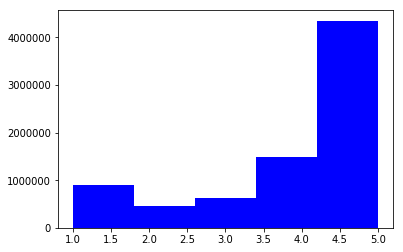

In [9]:
plt.hist(reviewDf['rating'],bins=5, color = 'b')

In [10]:
reviewDf["itemid"].value_counts().head(20)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
Name: itemid, dtype: int64

In [11]:
reviewDf["rating"].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64

In [12]:
reviewDf.shape

(7824482, 3)

In [29]:
# Create a dataframe with data which has users who have given 50 or more reviews. 

group=reviewDf.groupby('userid')
NewDf=group.filter(lambda x:len(x)>=100)

In [78]:
NewDf.shape

(44209, 3)

In [79]:
NewDf.head()

,userid,itemid,rating
118,AT09WGFUM934H,0594481813,3.0
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1777,A18S2VGUH9SCV5,1400501776,4.0
2162,A5JLAU2ARJ0BO,1400532655,1.0


### Popularity based recommendation

In [80]:
# I will use items and ratings to do summary on counts or sum to come up with popular items 
X=NewDf[['itemid','rating']]

In [81]:
X.head()

,itemid,rating
118,0594481813,3.0
178,0970407998,4.0
631,0972683275,5.0
1777,1400501776,4.0
2162,1400532655,1.0


In [83]:
#I am trying to sum the rating given by users to come up with the popularity. We can use count to check popularity too.

RatingSum=pd.DataFrame(X.groupby(['itemid'])['rating'].sum())

In [85]:
#Top 5 most rated.
RatingSum.sort_values('rating',ascending=False).head(5)

,rating
itemid,
B0088CJT4U,312.0
B003ES5ZUU,274.0
B002R5AM7C,246.0
B00829TIEK,235.0
B004CLYEDC,234.0


In [86]:
#I am trying to count the rating given by users to come up with the popularity.

RatingCount=pd.DataFrame(X.groupby(['itemid'])['rating'].count())

In [87]:
#Top 5 freequent rated.
RatingCount.sort_values('rating',ascending=False).head(5)

,rating
itemid,
B0088CJT4U,74
B002R5AM7C,60
B003ES5ZUU,55
B00829TIEK,52
B004CLYEDC,50


In [ ]:
# Above the most popular 5 items which are rated freequenty and as well as rated good. 

### Collaborative Filtering model

In [31]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [32]:
data = Dataset.load_from_df(NewDf[['userid', 'itemid', 'rating']], reader)

In [33]:
data

In [34]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [35]:
type(trainset)

surprise.trainset.Trainset

In [36]:
#Train The Model

In [37]:
from surprise import KNNWithMeans
from surprise import accuracy

In [43]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


### Evaluate Model

In [44]:
len(testset)

11053

In [45]:
testset[0:5]

[('A34C9AFFZOI45T', 'B00585CLR2', 5.0),
 ('A19W47CXJJP1MI', 'B001U612R8', 5.0),
 ('A3R19YKNL641X3', 'B00D65AJ0C', 5.0),
 ('A1VQHH85U7PX0', 'B00J3HMY1E', 3.0),
 ('A2KOV8XWZOZ0FQ', 'B00829THEG', 4.0)]

In [46]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.0278


1.027831069732067

In [50]:
# View a particular prediction
test_pred[2]

# To access a particular value, say estimate simply mention test_pred[12].est

Prediction(uid='A3R19YKNL641X3', iid='B00D65AJ0C', r_ui=5.0, est=4.2888721076307865, details={'actual_k': 3, 'was_impossible': False})

In [52]:
test_pred[2].details['actual_k']

3

In [53]:
# convert results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df["was_impossible"] = [x["was_impossible"] for x in test_pred_df["details"]]

In [54]:
test_pred_df.loc[test_pred_df.was_impossible].head(5)

,uid,iid,r_ui,est,details,was_impossible
0,A34C9AFFZOI45T,B00585CLR2,5.0,4.28016,"{'was_impossible': True, 'reason': 'User and/o...",True
9,A3OA4DV4L81N1D,B002N5CV8Y,4.0,4.28016,"{'was_impossible': True, 'reason': 'User and/o...",True
10,A3L1VJMHFWONCB,B005MRXUWG,4.0,4.28016,"{'was_impossible': True, 'reason': 'User and/o...",True
12,A2B7BUH8834Y6M,B0083T1KDG,5.0,4.28016,"{'was_impossible': True, 'reason': 'User and/o...",True
14,A10Y058K7B96C6,B005UA65YA,4.0,4.28016,"{'was_impossible': True, 'reason': 'User and/o...",True


### Get top k=5 Recommendations

In [55]:
testset_new = trainset.build_anti_testset()

In [56]:
len(testset_new)

5328661

In [57]:
testset_new[0:5]

[('A22S7D0LP8GRDH', 'B006427IY4', 4.280160453613222),
 ('A22S7D0LP8GRDH', 'B00D50UNRM', 4.280160453613222),
 ('A22S7D0LP8GRDH', 'B0043GCBU4', 4.280160453613222),
 ('A22S7D0LP8GRDH', 'B00FLNYH8M', 4.280160453613222),
 ('A22S7D0LP8GRDH', 'B000FBK3QK', 4.280160453613222)]

In [58]:
predictions = algo.test(testset_new[0:10000])

In [63]:
predictions

[Prediction(uid='A22S7D0LP8GRDH', iid='B006427IY4', r_ui=4.280160453613222, est=4.5476190476190474, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B00D50UNRM', r_ui=4.280160453613222, est=4.997431163537753, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B0043GCBU4', r_ui=4.280160453613222, est=4.5476190476190474, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B00FLNYH8M', r_ui=4.280160453613222, est=4.5476190476190474, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B000FBK3QK', r_ui=4.280160453613222, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B0002KH73Q', r_ui=4.280160453613222, est=4.5476190476190474, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A22S7D0LP8GRDH', iid='B004DI7CW4', r_ui=4.280160453613222, est=4.5476190476190474, details={'ac

In [64]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [69]:
predictions_df.columns = ["userId","itemid","est_rating"]
predictions_df.sort_values(by = ["itemid", "est_rating"],ascending=False,inplace=True)

In [71]:
predictions_df.head()

,userId,itemid,est_rating
12,A22S7D0LP8GRDH,B00LKG1MC8,4.547619
5040,A22S7D0LP8GRDH,B00LI4ZZO8,4.547619
8394,A22S7D0LP8GRDH,B00LGQ6HL8,4.547619
4326,A22S7D0LP8GRDH,B00LBZ1Z7K,3.092447
8142,A22S7D0LP8GRDH,B00L8I6SFY,4.547619


In [75]:
top_5_recos = predictions_df.groupby("userId").head(5).reset_index(drop=True)

In [76]:
top_5_recos

,userId,itemid,est_rating
0,A22S7D0LP8GRDH,B00LKG1MC8,4.547619
1,A22S7D0LP8GRDH,B00LI4ZZO8,4.547619
2,A22S7D0LP8GRDH,B00LGQ6HL8,4.547619
3,A22S7D0LP8GRDH,B00LBZ1Z7K,3.092447
4,A22S7D0LP8GRDH,B00L8I6SFY,4.547619


### Summary

In [ ]:
# The collaborative filtering uses the combination of userid and itemid to come up with ratings based on history.

# In case of popularity based recommendation we rely on counts / freequency of item.